# Report 
## Phần 1: Giới thiệu
### Thành viên nhóm:
| Họ và tên         | MSSV |
|:------------------|:------:|
| Lê Hoàng Khang    |  20133050  |
| Nguyễn Duy Thái   |  20133020  |
| Nguyễn Thanh Hùng | 20133045 |
| Lê Phước Yên      | 20133119 |

### 1.	Tóm tắt (Abstract)
Bài toán recommend là một trong những bài toán quan trọng trong lĩnh vực học máy và khai phá dữ liệu. Nhiệm vụ của nó là tạo ra các gợi ý phù hợp cho người dùng dựa trên sở thích và hành vi trước đó của họ.

Động lực của bài toán gợi ý sách này bắt nguồn từ việc số lượng sách trên thị trường ngày càng tăng, và người đọc gặp khó khăn trong việc tìm kiếm sách phù hợp với sở thích và nhu cầu của mình. Đồng thời, các nền tảng sách trực cần cung cấp gợi ý sách chính xác để tăng cường trải nghiệm người dùng và tăng doanh số bán hàng.

Để giải quyết bài toán recommend sách, ta cần có dữ liệu về sách bao gồm thông tin về tiêu đề sách, tác giả, thể loại, nội dung, năm xuất bản,… và đánh giá của người dùng sau khi đọc cuốn sách đó.Tiếp theo, nhóm sẽ sử dụng các thuật toán học máy như collaborative filtering, content-based filtering để tiến hành khớp với dữ liệu và đưa ra dự đoán. 

Collaborative filtering dựa trên hành vi đọc sách của người dùng và tìm kiếm những người dùng có sở thích tương tự để đề xuất sách. Content-based filtering dựa trên các thuộc tính của sách để tìm kiếm những sách tương tự.

Bài toán recommend sách có động lực mạnh mẽ từ nhu cầu tìm kiếm sách phù hợp và cần sử dụng các phương pháp học máy và khai phá dữ liệu để cung cấp gợi ý sách chính xác và đa dạng cho người dùng.

### 2.	Giới thiệu (Introduction)
Như đã trình bày trong mục trên, nhóm sẽ sử dụng 2 phương pháp chính là Collaborative Filtering và Content-Based Filtering. 
Đối với phương pháp Collaborative Filtering:

Đầu vào:
-	Dữ liệu người dùng: Bao gồm thông tin về người dùng như ID người dùng, đánh giá sách và bất kỳ thông tin cá nhân khác có thể được thu thập (ví dụ: độ tuổi, giới tính, quốc gia).
-	Dữ liệu sách: Bao gồm thông tin về các cuốn sách như tiêu đề, tác giả, thể loại, mô tả, danh sách tác giả khác của cuốn sách, và bất kỳ thuộc tính nào khác mô tả nội dung của sách.

Đầu ra: Dựa trên thông tin đầu vào, hệ thống Collaborative Filtering sẽ tạo ra các đầu ra sau đây:
-	Gợi ý sách: Hệ thống sẽ đề xuất một danh sách các cuốn sách mà người dùng có thể quan tâm dựa trên sở thích và hành vi đọc sách của họ. 
-	Đánh giá dự đoán: Hệ thống có thể dự đoán đánh giá mà người dùng có thể đưa ra cho một cuốn sách chưa được đọc dựa trên lịch sử đánh giá của họ và đánh giá của những người dùng khác có sở thích tương tự.
Đối với phương pháp Content-Based Filtering:

Đầu vào: 
-	Dữ liệu sách: Bao gồm thông tin về các cuốn sách như tiêu đề, tác giả, thể loại, mô tả và bất kỳ thuộc tính nào khác mô tả nội dung của sách.
-	Vector TF-IDF: Đầu vào cho hệ thống Content-Based Filtering là vector TF-IDF của từng cuốn sách. Vector TF-IDF biểu diễn mức độ quan trọng của từng từ trong cuốn sách dựa trên tần suất xuất hiện của từ đó trong tài liệu và trong toàn bộ tập dữ liệu.

Đầu ra: Dựa trên thông tin đầu vào và vector TF-IDF, hệ thống Content-Based Filtering sẽ tạo ra các đầu ra sau đây:
-	Gợi ý sách: Hệ thống sẽ đề xuất một danh sách các cuốn sách mà người dùng có thể quan tâm dựa trên keyword mà người dùng quan tâm.Các cuốn sách có vector TF-IDF gần giống nhau sẽ được ưu tiên đề xuất.
-	Độ tương đồng sách: Hệ thống có thể cung cấp thông tin về mức độ tương đồng giữa các cuốn sách dựa trên vector TF-IDF của chúng. Điều này giúp người dùng khám phá các cuốn sách có nội dung tương tự hoặc liên quan.

In [1]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.ml.recommendation import ALS
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.feature import RegexTokenizer, CountVectorizer
from pyspark.ml.feature import StopWordsRemover
from pyspark.ml.feature import IDF
from pyspark.ml import Pipeline
import numpy as np
from pyspark.ml.evaluation import RegressionEvaluator

from matplotlib import pyplot as plt
import seaborn as sns


from pyspark.sql.functions import *
from pyspark.sql.types import *

from IPython.display import Image, display
import findspark

findspark.init()

sc = SparkContext()
spark = SparkSession.builder.appName("FinalProject").getOrCreate()

# Get sparkcontext from
sqlContext = SQLContext(sc)

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\pyspark\sql\context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


### 3.	Dữ liệu (Data)
#### 3.1 Mô tả tập dữ liệu
Dữ liệu sách do nhóm thu thập được trên trang web kaggle. Đây là link đến tập dữ liệu: https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset 
Tập dữ liệu gồm 3 file chính chứa bao gồm khoảng 278.858 người dùng, cung cấp hơn 1 triệu lượt ratings về khoảng 270.379 cuốn sách: 
-	BX-Book-Ratings: bao gồm ID của người dùng, mã của từng cuốn sách, và rating của người dùng đối với cuốn sách đó.
-	BX-Users: bao gồm ID của người dùng, địa chỉ và độ tuổi.
-	BX-Books: bao gồm mã từng cuốn sách, tiêu đề sách, tác giả, năm xuất bản, nhà xuất bản, nội dung tóm tắt và link đến ảnh của cuốn sách.

In [2]:
# đọc dữ liệu bảng book-ratings
ratings = spark.read.csv("../Data/BX-Book-Ratings.csv", sep=";", header=True, encoding="latin1")
users = spark.read.csv("../Data/BX-Users.csv", sep=";", header=True, encoding="latin1")
books = spark.read.csv("../Data/BX_Books.csv", sep=";", header=True, encoding="latin1")
summary = spark.read.parquet("../Data/Summaryyy.parquet")
ratings.show(5)
users.show(5)
books.show(5, False)
summary.show(5)

+-------+----------+-----------+
|User-ID|      ISBN|Book-Rating|
+-------+----------+-----------+
| 276725|034545104X|          0|
| 276726|0155061224|          5|
| 276727|0446520802|          0|
| 276729|052165615X|          3|
| 276729|0521795028|          6|
+-------+----------+-----------+
only showing top 5 rows

+-------+--------------------+----+
|User-ID|            Location| Age|
+-------+--------------------+----+
|      1|  nyc, new york, usa|NULL|
|      2|stockton, califor...|  18|
|      3|moscow, yukon ter...|NULL|
|      4|porto, v.n.gaia, ...|  17|
|      5|farnborough, hant...|NULL|
+-------+--------------------+----+
only showing top 5 rows

+----------+--------------------------------------------------------------------------------------------------+--------------------+-------------------+-----------------------+------------------------------------------------------------+------------------------------------------------------------+-------------------------------

#### 3.2 Tiền xử lý dữ liệu

Join 3 bảng lại với nhau


In [3]:
books = books.join(summary, on="ISBN", how="inner")
df = ratings.join(users, on='User-ID')
df = df.join(books, on='ISBN')

Chuyển đổi kiểu dữ liệu String - Integer

In [4]:
df = df.withColumn("Age", df["Age"].cast(IntegerType()))
df = df.withColumn("Year-Of-Publication",
                   df["Year-Of-Publication"].cast(IntegerType()))
df = df.withColumn("Book-Rating", df["Book-Rating"].cast(IntegerType()))
df = df.withColumn("User-ID", df["User-ID"].cast(IntegerType()))

df = df.withColumn("location_array", split(df["location"], ", "))
df = df.withColumn("country", df["location_array"][2])
df = df.drop("location_array")

Xóa các kí tự chữ cái trong ISBN và chuyển về kiểu int

In [5]:
df = df.withColumn(
    "ISBN",
    when(

        expr("substring(ISBN, -1, 1) = 'X'"),

        expr("substring(ISBN, 1, length(ISBN) - 1)"),

    ).otherwise(col("ISBN")),
)


df = df.withColumn("ISBN", df["ISBN"].cast(IntegerType()))

Đếm cột Age có bao nhiêu giá trị null và thực hiện thay thế giá trị null cột Age bằng giá trị trung bình của cột


In [6]:
df.where((col("Age").isNull())).count()
average_age = df.select(avg("Age")).collect()[0][0]
df = df.withColumn("Age", when(col("Age").isNull(),
                   int(average_age)).otherwise(col("Age")))

Xóa những rating có giá trị = 0 ra khỏi tập dữ liệu, có thể là do người dùng chưa thực hiện rating hoặc có lỗi trong quá trình thu thập


In [7]:
df = df.filter(df["Book-Rating"] != 0)

# in ra tổng số dòng của dữ liệu sau khi xử lí
df.count()

df = df.dropna(subset=["ISBN"])
df = df.drop("Image-URL-S")
df = df.drop("Image-URL-L")

### 4. Phương pháp (Methods)
4.1. Phương pháp Collaborative Filtering sử dụng thuật toán ALS
- Thuật toán ALS (Alternating Least Squares) là một phương pháp phân rã ma trận được sử dụng trong hệ thống recommendation. Ý tưởng chính của ALS là tìm cách phân rã ma trận đánh giá thành hai ma trận con, một ma trận đại diện cho người dùng và một ma trận đại diện cho các mục tiêu (items). 

- Thuật toán ALS bắt đầu bằng việc khởi tạo ngẫu nhiên hai ma trận đại diện cho người dùng và các mục tiêu. Sau đó, nó sẽ lần lượt cập nhật các ma trận này bằng cách giải hai bài toán tối ưu riêng lẻ. 

- Cụ thể, trong bước cập nhật ma trận người dùng, ALS sử dụng phương pháp bình phương tối tiểu (least squares) để tìm ma trận người dùng tốt nhất sao cho tổng bình phương sai số giữa ma trận ban đầu và ma trận đã cập nhật là nhỏ nhất. Quá trình này liên tục được lặp lại cho đến khi đạt được điều kiện dừng.

- Tương tự, trong bước cập nhật ma trận mục tiêu, ALS sử dụng phương pháp bình phương tối tiểu để tìm ma trận mục tiêu tốt nhất sao cho tổng bình phương sai số giữa ma trận ban đầu và ma trận đã cập nhật là nhỏ nhất. 

- Thuật toán ALS tiếp tục lặp lại quá trình cập nhật cho đến khi đạt được điều kiện dừng, ví dụ như số lần lặp tối đa hoặc sai số giữa các lần cập nhật liên tiếp không đáng kể. Như vậy, ALS giúp tìm ra các ma trận đại diện tốt nhất cho người dùng và các mục tiêu, từ đó xây dựng hệ thống recommendation dựa trên đánh giá của người dùng trước đó.

Chia tập dữ liệu

In [8]:
training_df, validation_df = df.randomSplit([.7, .3], seed=22)

In [9]:
# Khởi tạo các tham số
als = ALS(
    maxIter=15,
    regParam=1,
    rank=10,
    userCol="User-ID",
    itemCol="ISBN",
    ratingCol="Book-Rating",
    coldStartStrategy="drop",
    nonnegative=True
)

model = als.fit(training_df)

predictions = model.transform(validation_df)

# Đánh giá mô hình bằng giá trị RMSE
evaluator = RegressionEvaluator(
    metricName="rmse", labelCol="Book-Rating", predictionCol="prediction"
)
rmse = evaluator.evaluate(predictions)
print("RMSE value", str(rmse))

RMSE value 2.2188869440141965


4.1. Phương pháp Content-Based Filtering

Phương pháp Content-Based là một phương pháp trong lĩnh vực học máy và khai phá dữ liệu, được sử dụng để gợi ý hoặc đề xuất các mục (items) mới cho người dùng dựa trên thông tin về các mục đã được đánh giá trước đó. Phương pháp này tập trung vào nội dung (content) của các mục và xây dựng mô hình để đo lường mức độ tương đồng giữa các mục dựa trên các đặc trưng của chúng.

Cách thức hoạt động của phương pháp Content-based thường bao gồm các bước sau:

- Xác định các đặc trưng (features) của các mục: Đây có thể là các thuộc tính hoặc thông tin mô tả của các mục, ví dụ: từ khóa, thể loại, diễn viên, nhãn hiệu, v.v.

- Biểu diễn các mục dưới dạng vector: Các đặc trưng của các mục được biểu diễn dưới dạng vector.

- Xây dựng mô hình tương đồng: Một mô hình được xây dựng để đo lường mức độ tương đồng giữa các mục dựa trên biểu diễn vector của chúng. Phương pháp đo lường tương đồng thông thường bao gồm độ đo Cosine.

- Gợi ý các mục tương tự: Dựa trên mô hình tương đồng, các mục có mức độ tương đồng cao với mục đang xem xét được gợi ý cho người dùng.

Phương pháp Content-based thường được sử dụng trong các hệ thống gợi ý (recommendation systems) để đề xuất các mục tương tự hoặc liên quan dựa trên sự tương đồng về nội dung của các mục.

In [10]:
book_sample = books.sample(0.2, seed=123)
text = book_sample.select("ISBN", "Summary")
text.show(3, False)

+----------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|ISBN      |Summary                                                                                                                                                                                                                                                    |
+----------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|3423620005|Wer bist du? &quot;fragt eín unbekannter Absender Sofie in einem\nBrief. Noch am selben Tag kommt ein Zweiter. &quot;Woher hommt die\nWelt?&quot; will diesmal der Schreiber wissen              

In [11]:
from operator import add

text_by_book = text.rdd.map(tuple).reduceByKey(add)
columns = ["ISBN", "Summary"]
text_by_book_df = spark.createDataFrame(text_by_book, schema=columns)

tokenizer = RegexTokenizer(
    pattern="\w+", inputCol="Summary", outputCol="tokens", toLowercase=True, gaps=False
)
stopWordsRemover = StopWordsRemover(inputCol="tokens", outputCol="nostopwords")
countVectorizer = CountVectorizer(
    inputCol="nostopwords", outputCol="tf", vocabSize=1000
)
tfiDF = IDF(inputCol="tf", outputCol="tfidf_vec")
pipeline = Pipeline(
    stages=[tokenizer, stopWordsRemover, countVectorizer, tfiDF])


# Fit the model
pipeline_model = pipeline.fit(text_by_book_df)

In [12]:
transformed_text_by_books = pipeline_model.transform(text_by_book_df)

In [13]:
def cosineSimilarity(vector1, vector2):
    numerator = np.dot(vector1, vector2)
    denominator = np.sqrt(np.dot(vector1, vector1)) * \
        np.sqrt(np.dot(vector2, vector2))

    return float(numerator / denominator)


In [14]:
all_books_tfidf = transformed_text_by_books.select("ISBN", "tfidf_vec").rdd.map(lambda x: (x[0], x[1]))

In [15]:
def getBookDetails(sim_book):
    book_details = sim_book.join(books, "ISBN", "inner").select(
        "ISBN",
        "similarity_score",
        "Book-Title",
        "Book-Author",
        "Year-Of-Publication",
        "Publisher",
        "Image-URL-M",
        "Summary",
    )

    return book_details


In [16]:
def keyWordsRecommendation(keyword, all_books_tfidf):
    input_word_df = sc.parallelize([(0, keyword)]).toDF(["ISBN", "Summary"])
    input_word_df = pipeline_model.transform(input_word_df)
    input_word_tfidf = input_word_df.select("tfidf_vec").collect()[0][0]

    similar_books_rdd = all_books_tfidf.map(
        lambda x: (x[0], cosineSimilarity(x[1], input_word_tfidf))
    )

    sim_book_by_keyword = (
        similar_books_rdd.toDF(["ISBN", "similarity_score"])
        .dropna()
        .orderBy("similarity_score", ascending=False)
        .limit(10)
    )

    return sim_book_by_keyword

### 5. Thực nghiệm, kết quả, và thảo luận (Experiments, Results, and Discussions)

5.1 Visualization

Nhóm sẽ thực hiện trực quan một vài biểu đồ để đưa ra các nhận định về sự đề xuất sách cho các người đọc tiếp cận.

Text(0.5, 1.0, 'Rating Distribution')

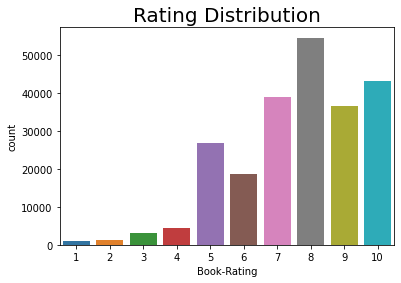

In [17]:
df_1 = df.toPandas()

plt.figure(figsize=(6, 4))
sns.countplot(x="Book-Rating", data=df_1)
plt.title("Rating Distribution", size=20)

Qua biểu đồ phân bố rating, ta có thể thấy điểm rating nằm từ 1-10, phân bố cao vào khoảng từ 5-10, cho thấy lượt đánh giá của 1 user cho một cuốn sách là cao.

Text(0.5, 1.0, 'Authors with most Ratings')

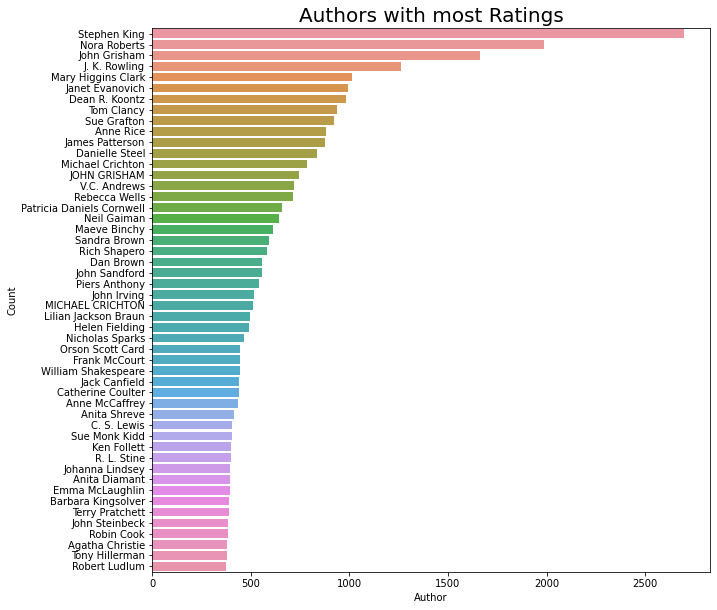

In [18]:


ds = df_1["Book-Author"].value_counts().head(50).reset_index()
ds.columns = ["author", "count"]

plt.figure(figsize=(10, 10))
sns.barplot(x="count", y="author", data=ds)
plt.xlabel("Author")
plt.ylabel("Count")
plt.title("Authors with most Ratings", size=20)

Nhóm nhận thấy rằng qua biểu đồ các tác giả như "Stephen King, Nora Roberts, John Grisham, J. K. Rowling" có số lượng sách viết ra khá là nhiều và có thể là tuần số ra sách khá là thường xuyên. Do vậy có thể hệ thống sẽ đưa ra đề xuất với các tác giả sau cao hơn các tác giả khác.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

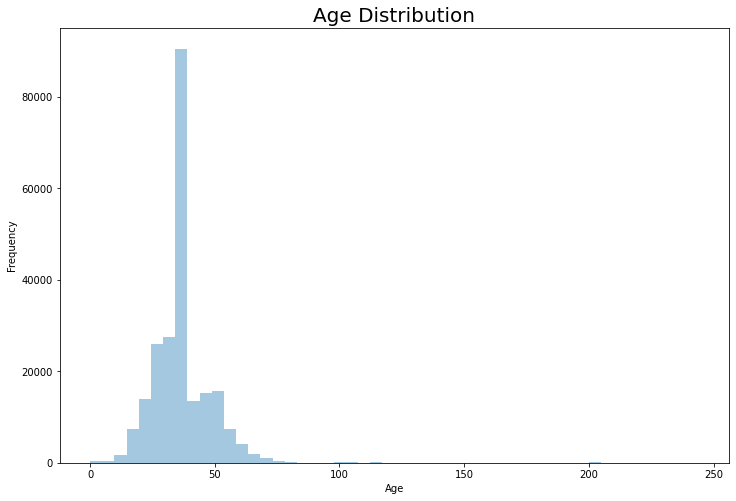

In [19]:
plt.figure(figsize=(12, 8))
sns.distplot(df_1["Age"], kde=False)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution", size=20)

Từ biểu đồ có thể nhận thấy số lượng đọc sách của lứa tuổi trung niên (25-40) khá nhà nhiều vược mặt những lứa tuổi khác. Nhận thấy rằng tầm quan trọng của việc đọc sách mà nó mang lại khá là tốt.

5.2 Thuật toán ALS

Với thuật toán này, có một số siêu tham số được sử dụng để cấu hình và huấn luyện mô hình ALS. Dưới đây là giải thích cho mỗi siêu tham số:

- maxIter: Đây là số lượng lặp lại tối đa của thuật toán ALS. Nó xác định số lần mô hình sẽ được cập nhật theo thứ tự lặp lại ma trận người dùng-latent factors và ma trận latent factors-mục.

- regParam: Tham số điều chuẩn (regularization parameter) được sử dụng để kiểm soát overfitting trong quá trình huấn luyện. Giá trị regParam càng cao, càng giảm khả năng mô hình bị overfitting.

- rank: Đây là kích thước của các latent factors, tức là số chiều của ma trận người dùng-latent factors và ma trận latent factors-mục. Thông thường, rank được lựa chọn như một giá trị nhỏ hơn kích thước thực sự của ma trận đánh giá để giảm chiều dữ liệu và tăng tốc độ tính toán.

Giá trị RMSE để đánh giá chất lượng của mô hình ALS. RMSE đo lường mức độ sai lệch giữa giá trị dự đoán và giá trị thực tế, và giá trị càng thấp thì mô hình càng chính xác.

* `RMSE = sqrt(Σ(Giá trị dự đoán - Giá trị thực tế)^2 / Số lượng items)`

Thực hiện việc tìm kiếm và chọn mô hình ALS tốt nhất dựa trên cross-validation trên tập dữ liệu huấn luyện, và sau đó in ra các giá trị tốt nhất của các siêu tham số. 

In [20]:
paramGrid = (
    ParamGridBuilder()
    .addGrid(als.maxIter, [5, 10, 15])
    .addGrid(als.regParam, [0.01, 0.1, 1])
    .addGrid(als.rank, [10, 20, 30, 40])
    .build()
)

evaluator = RegressionEvaluator(
    metricName="rmse", labelCol="Book-Rating", predictionCol="prediction"
)

cv = CrossValidator(
    estimator=als, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5
)

best_model = cv.fit(training_df)
model = best_model.bestModel
print(model)

print("Best params:")
print("maxIter:", model._java_obj.parent().getMaxIter())  
print("regParam:", model._java_obj.parent().getRegParam())  
print("rank:", model._java_obj.parent().getRank())  

ALSModel: uid=ALS_bc2c5ca3f29f, rank=10
Best params:
maxIter: 15
regParam: 1.0
rank: 10


Quá trình thực nghiệm với 1 user.

In [21]:
predictions.select("User-ID", "Book-Title", "Book-Rating", "prediction").orderBy(
    col("User-ID")
).show(5, False)

+-------+---------------------------------------------+-----------+----------+
|User-ID|Book-Title                                   |Book-Rating|prediction|
+-------+---------------------------------------------+-----------+----------+
|53     |A Soldier of the Great War                   |9          |2.4279265 |
|99     |Pasquale's Nose: Idle Days in an Italian Town|7          |6.457656  |
|99     |The Pillars of the Earth                     |3          |7.304619  |
|114    |Dead Aim                                     |9          |7.686734  |
|165    |Little Altars Everywhere: A Novel            |9          |3.3577926 |
+-------+---------------------------------------------+-----------+----------+
only showing top 5 rows



5.3 Phương pháp Content-Based Filtering

Một pipeline được sử dụng để xây dựng một quy trình xử lý dữ liệu văn bản. Dưới đây là giải thích cho mỗi siêu tham số trong quy trình xử lý dữ liệu:

- RegexTokenizer: Đây là một bộ phân mảnh (tokenizer) dựa trên biểu thức chính quy (regex) được sử dụng để phân tách văn bản thành các từ riêng biệt. Tham số pattern xác định biểu thức chính quy để tách từ, và inputCol là tên cột chứa văn bản đầu vào. Kết quả của bộ phân mảnh sẽ được lưu vào cột tokens.

- StopWordsRemover: Đây là một bộ loại bỏ từ dừng (stop words) được sử dụng để loại bỏ các từ phổ biến và không mang nhiều ý nghĩa từ văn bản. Tham số inputCol là tên cột chứa danh sách các từ đã được phân mảnh, và outputCol là tên cột chứa kết quả sau khi loại bỏ từ dừng. Kết quả sẽ được lưu vào cột nostopwords.

- CountVectorizer: Đây là một bộ vector hóa đếm (count vectorizer) được sử dụng để biến đổi các văn bản thành vectơ đếm. Tham số inputCol là tên cột chứa danh sách các từ đã được loại bỏ từ dừng, và outputCol là tên cột chứa vectơ đếm. Tham số vocabSize xác định số lượng từ duy nhất trong từ điển của vectơ đếm.

- IDF: Đây là một bộ trọng số IDF (Inverse Document Frequency) được sử dụng để tính toán trọng số IDF cho các từ trong vectơ đếm. Tham số inputCol là tên cột chứa vectơ đếm, và outputCol là tên cột chứa vectơ trọng số IDF.

- Pipeline: Đây là một chuỗi các giai đoạn (stages) xử lý dữ liệu văn bản. Các giai đoạn được xác định bằng danh sách các đối tượng xử lý dữ liệu, bao gồm tokenizer, stopWordsRemover, countVectorizer và tfiDF. Các giai đoạn sẽ được thực hiện theo thứ tự trong danh sách.

Sau khi khởi tạo pipeline và định nghĩa các giai đoạn, mô hình pipeline được huấn luyện bằng cách gọi phương thức fit() trên dữ liệu văn bản text_by_book_df. Quá trình huấn luyện sẽ thực hiện lần lượt các giai đoạn trong pipeline, và kết quả cuối cùng là một pipeline_model chứa các thông tin và trạng thái của mô hình đã được huấn luyện.

Nhóm thực hiện thử nghiệm với 1 key word để đưa ra các để xuất

In [28]:
# Key word similarity in review text for recommendation
key_word = "wild animal"

print(f"\nBooks similar to keyword - {key_word}")
sim_books_keyword = keyWordsRecommendation(key_word, all_books_tfidf)

# Get details of these similar restaurants
sim_books_keyword_details = getBookDetails(sim_books_keyword)
sim_books_keyword_details.cache()
sim_books_keyword_details.orderBy("similarity_score", ascending=False).show(10, False)



Books similar to keyword - wild animal
+----------+-------------------+---------------------------------------------------------------------+-----------------+-------------------+-----------------------------------+------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|ISBN      |similarity_score   |Book-Title                                                           |Book-Author      |Year-Of-Publication|Publisher                          |Image-URL-M                                                 |Summary                                                                                                                                                                                                                                      

In [27]:
for url in sim_books_keyword_details.take(5):
    print("Title: ", url["Book-Title"])
    display(Image(url=url["Image-URL-M"]))
    print("Summary: ", url["Summary"])
    print("\n")

Title:  Strolling with Our Kin: Speaking for and Respecting Voiceless Animals


Summary:  A look at animal protection and compassion, using animals as fur and
food, animal pain and suffering, and dissection and vivisection.


Title:  My Wild World


Summary:  Embery, the San Diego Zoo&#39;s Wild Animal Ambassador, describes how
she first began working with animals and discusses her successful
career training and caring for an amazing variety of exotic and wild
creatures


Title:  Big Pictures: Wild Animals


Summary:  Each photograph of a wild mammal or bird is accompanied by a question
and answer offering information about the animal or its behavior


Title:  Hamsters & Guinea Pigs (First Pets)


Summary:  An introduction to guinea pigs for one interested in that animal as a
pet.


Title:  The Mystery of the Ivory Charm (Nancy Drew Mystery Stories, No 13)


Summary:  Nancy Drew determines whether an ivory elephant charm really protects
its wearer from harm when she investigates the involvement of a member
of the Bengleton Wild-Animal Show in a mysterious scheme.




### 6. Kết luận (Conclusions)
Qua quá trình thực hiện đề tài nhóm em đã học hỏi thêm kiến thức về các mô hình gợi ý sử dụng PySpark cho gợi ý sách. Về tổng quan đè tài đã hoàn thành mức cơ bản, đưa ra được các gợi ý dựa trên sở thích của người dùng và từ khóa được nhập vào. Sau đây là các nhận xét về các thuật toán mà nhóm đã sử dụng

6.1 Collaborative Filtering:

Ưu điểm:

- Dựa trên hành vi người dùng: Collaborative filtering sử dụng thông tin về sự tương tác giữa người dùng và các mục tiêu để đưa ra các gợi ý. Nó không cần thông tin chi tiết về nội dung của các mục tiêu và có thể tìm ra mối quan hệ ẩn giữa người dùng.

- Độc lập với nội dung: Collaborative filtering không phụ thuộc vào thông tin nội dung của các mục tiêu. Điều này có nghĩa là nó có thể đưa ra gợi ý cho các mục tiêu mới mà không cần thông tin chi tiết về nội dung của chúng.

Nhược điểm:

- Vấn đề người dùng mới (cold start): Collaborative filtering gặp khó khăn khi đưa ra gợi ý cho người dùng mới hoặc các mục tiêu mới chưa có sự tương tác từ người dùng. Vì thuật toán dựa trên thông tin tương tác, nếu không có đủ thông tin để xây dựng mô hình người dùng, khó đưa ra gợi ý chính xác.

- Vấn đề đánh giá chính xác: Đối với các tập dữ liệu lớn, việc tính toán độ tương đồng giữa người dùng hoặc mục tiêu có thể gặp phải vấn đề về hiệu suất tính toán. Đồng thời, việc đánh giá độ tương đồng có thể bị ảnh hưởng bởi sự thiếu thông tin hoặc đánh giá sai của người dùng.

6.2 Content-Based Filtering:

Ưu điểm:

- Dựa trên nội dung: Content-based filtering sử dụng thông tin về nội dung của các mục tiêu để đưa ra các gợi ý. Điều này cho phép thuật toán hiểu được sở thích của người dùng dựa trên các đặc tính nội dung của mục tiêu. Nó đặc biệt hữu ích khi đưa ra gợi ý cho người dùng mới hoặc khi không có đủ thông tin tương tác từ người dùng.

- Giải quyết vấn đề người dùng mới (cold start): Với việc sử dụng thông tin nội dung, content-based filtering có thể đưa ra gợi ý chính xác cho người dùng mới hoặc các mục tiêu mới mà không cần thông tin tương tác trước đó.

Nhược điểm:

- Hạn chế đa dạng: Content-based filtering có xu hướng đề xuất các mục tiêu tương tự với nhau dựa trên các đặc tính nội dung. Điều này có thể dẫn đến hạn chế đa dạng trong các gợi ý và không khám phá được những sở thích mới hoặc không gian mục tiêu rộng hơn.

- Vấn đề khó khăn trong việc xác định đặc tính nội dung: Để áp dụng content-based filtering, cần phải xác định các đặc tính nội dung quan trọng và biểu diễn chúng dưới dạng các đặc trưng. Việc này có thểgặp khó khăn và tốn thời gian, đặc biệt là đối với các loại nội dung phức tạp như âm nhạc, hình ảnh, video.

### 7. Phụ lục (Appendices)

### 8. Đóng góp (Contributions)

| Họ và tên         | MSSV      |Công việc                                                                 |
|:------------------|:---------:|-------------------------------------------------------------------------:|
| Lê Hoàng Khang    | 20133050  |Viết Proposal, Tìm kiếm dữ liệu, Thuật toán content-based filtering       |
| Nguyễn Duy Thái   | 20133020  |Viết Report, Tìm kiếm dữ liệu, Thuật toán content-based filtering         |
| Nguyễn Thanh Hùng | 20133045  |Viết Presentation, Tiền xử lý dữ liệu, Thuật toán collaborative filtering |
| Lê Phước Yên      | 20133119  |Viết Report, Trực quan hóa, Thuật toán collaborative filtering            |

### 9. Tham khảo (References)
Blog xây dựng hệ thống Recommendation với model ALS - https://www.linkedin.com/pulse/x%C3%A2y-d%E1%BB%B1ng-h%E1%BB%87-th%E1%BB%91ng-recommendation-v%E1%BB%9Bi-model-als-t%C3%A2m-tr%E1%BA%A7n/

Blog sử dụng Pyspark cho thuật toán Content-based filtering - https://medium0.com/@beepabose/content-based-filtering-for-book-recommendation-using-pyspark-4369c4cbe006

Github nehabais31 - https://github.com/nehabais31/Restaurant-Recommendation-System/blob/main/Restaurant_Recommendation_System.ipynb
